# Siamese network training

Add local paths to system in order to use local modules.

In [1]:
import sys
import os

# Get the current directory of the notebook
current_dir = os.getcwd()

# Construct the path to the parent directory
parent_dir = os.path.join(current_dir, "..")

# Add the parent directory to sys.path
sys.path.append(parent_dir)

Import packages.

In [2]:
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import numpy as np

from src.dataset import load_dataset_sample
from src.dataset import make_pairs
from src.fsl import build_siamese_network
from src.utils import plot_history

## Dataset preparation

Load dataset sample from dataset folder.

In [3]:
dataset_dir = "../data/dataset"
image_size = (256, 256)
n_samples = 100

dataset = load_dataset_sample(
    dataset_dir,
    n_samples=n_samples,
    target_size=image_size,
    operation="dilate"
)
images, labels, class_names = dataset

libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: bKGD: invalid
libpng warning: bKGD: invalid


Generate a random sample to explore some of the images.

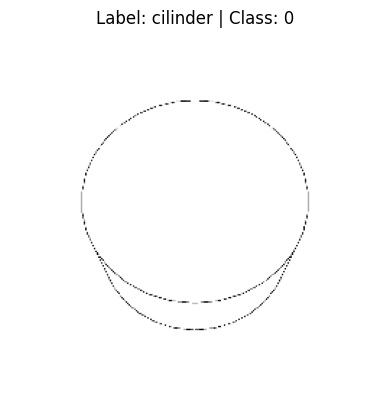

In [4]:
image_index = 7
plt.imshow(images[image_index], cmap="gray")
label_sample = class_names[labels[image_index]]
class_sample = labels[image_index]
plt.title(f"Label: {label_sample} | Class: {class_sample}")
plt.axis("off")
plt.show()

Split the dataset into training and testing datasets.

In [5]:
X_train, X_test, y_train, y_test = train_test_split(
    images, labels,
    test_size=0.2,
    random_state=42,
    stratify=labels
)

Build pairs of images for training and testing.

In [6]:
pair_images_train, pair_labels_train = make_pairs(X_train, y_train)
pair_images_test, pair_labels_test = make_pairs(X_test, y_test)

We can explore some of the give images.

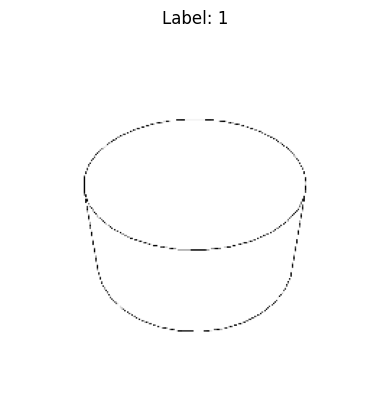

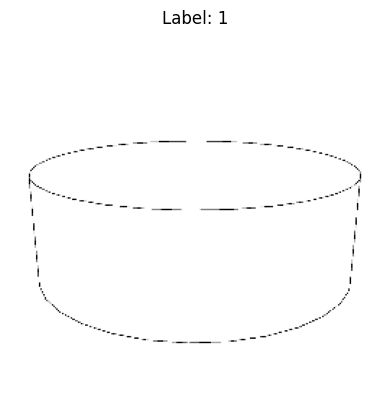

In [7]:
sample_index = 42

plt.imshow(pair_images_train[sample_index][0], cmap="gray")
plt.title(f"Label: {pair_labels_train[sample_index][0]}")
plt.axis("off")
plt.show()

plt.imshow(pair_images_train[sample_index][1], cmap="gray")
plt.title(f"Label: {pair_labels_train[sample_index][0]}")
plt.axis("off")
plt.show()

## Model training

Create an instance of the model.

In [8]:
channels = (256, 256, 1)
model = build_siamese_network(channels)

2025-09-09 19:26:17.501541: I metal_plugin/src/device/metal_device.cc:1154] Metal device set to: Apple M2
2025-09-09 19:26:17.501578: I metal_plugin/src/device/metal_device.cc:296] systemMemory: 8.00 GB
2025-09-09 19:26:17.501595: I metal_plugin/src/device/metal_device.cc:313] maxCacheSize: 2.67 GB
2025-09-09 19:26:17.501780: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:305] Could not identify NUMA node of platform GPU ID 0, defaulting to 0. Your kernel may not have been built with NUMA support.
2025-09-09 19:26:17.501795: I tensorflow/core/common_runtime/pluggable_device/pluggable_device_factory.cc:271] Created TensorFlow device (/job:localhost/replica:0/task:0/device:GPU:0 with 0 MB memory) -> physical PluggableDevice (device: 0, name: METAL, pci bus id: <undefined>)


Compile the model.

In [9]:
from tensorflow.keras.optimizers import Adam

model.compile(
    optimizer=Adam(learning_rate=0.01),
    loss="mean_squared_error",
    metrics=["accuracy"]
)

Train the model.

In [10]:
history = model.fit(
    [pair_images_train[:, 0], pair_images_train[:, 1]],
    pair_labels_train[:],
    validation_data=(
        [pair_images_test[:, 0], pair_images_test[:, 1]],
        pair_labels_test[:]
    ),
    epochs=50
)

Epoch 1/50


2025-09-09 19:26:23.300461: I tensorflow/core/grappler/optimizers/custom_graph_optimizer_registry.cc:117] Plugin optimizer for device_type GPU is enabled.


5/5 ━━━━━━━━━━━━━━━━━━━━ 7s 969ms/step - accuracy: 0.5000 - loss: 0.2263 - val_accuracy: 0.5000 - val_loss: 0.2138
Epoch 2/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 815ms/step - accuracy: 0.5000 - loss: 0.1971 - val_accuracy: 0.6500 - val_loss: 0.2125
Epoch 3/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 818ms/step - accuracy: 0.5813 - loss: 0.1923 - val_accuracy: 0.6750 - val_loss: 0.2045
Epoch 4/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 832ms/step - accuracy: 0.6875 - loss: 0.1850 - val_accuracy: 0.7000 - val_loss: 0.1986
Epoch 5/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 814ms/step - accuracy: 0.7375 - loss: 0.1819 - val_accuracy: 0.7000 - val_loss: 0.1955
Epoch 6/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 835ms/step - accuracy: 0.7500 - loss: 0.1782 - val_accuracy: 0.7250 - val_loss: 0.1921
Epoch 7/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 830ms/step - accuracy: 0.8188 - loss: 0.1746 - val_accuracy: 0.8500 - val_loss: 0.1895
Epoch 8/50
5/5 ━━━━━━━━━━━━━━━━━━━━ 4s 807ms/step - accuracy: 0.8062 - loss: 0.1712 - val_accuracy: 0.8250 - val_loss: 0.1868
Epo

Display the training history.

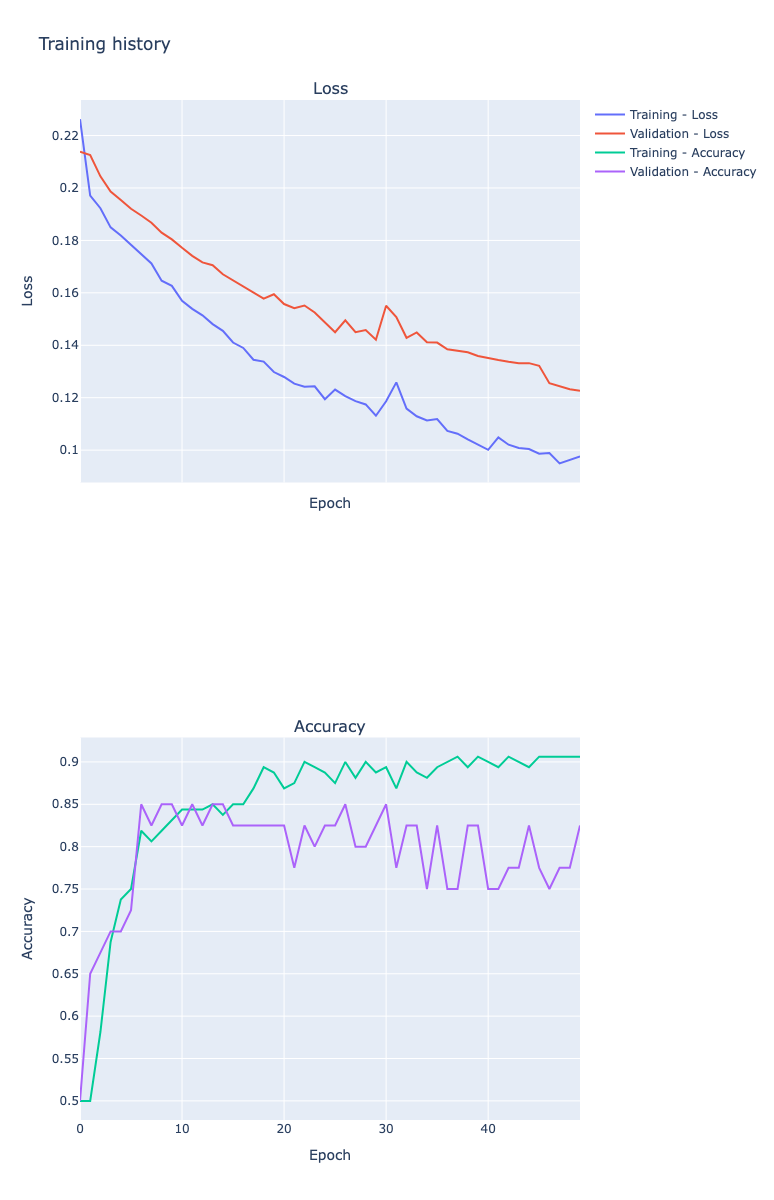

In [11]:
plot_history(history)

## Inference using model

Select a random pair of images from testing data.

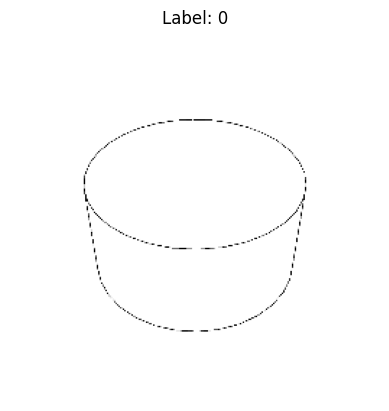

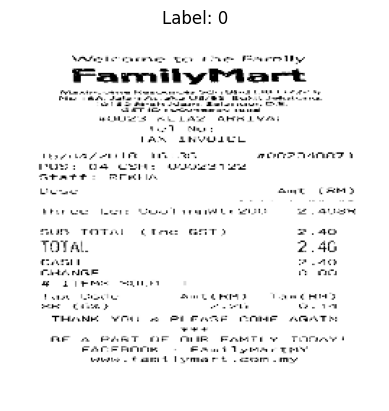

In [12]:
sample_index = 21

plt.imshow(pair_images_test[sample_index][0], cmap="gray")
plt.title(f"Label: {pair_labels_test[sample_index][0]}")
plt.axis("off")
plt.show()

plt.imshow(pair_images_test[sample_index][1], cmap="gray")
plt.title(f"Label: {pair_labels_test[sample_index][0]}")
plt.axis("off")
plt.show()

In [13]:
# Expand batch dimension
img_A = np.expand_dims(pair_images_test[sample_index][0], axis=0)  # (1, 256, 256, 1)
img_B = np.expand_dims(pair_images_test[sample_index][1], axis=0)

In [14]:
score = model.predict([img_A, img_B])[0][0]
print(f"Resulting score: {score}")

1/1 ━━━━━━━━━━━━━━━━━━━━ 1s 663ms/step
Resulting score: 0.23501567542552948


## Save model

In [15]:
model.save_weights("../models/siamese.weights.h5")

## Load trained model

In [16]:
loaded_model = build_siamese_network()
loaded_model.load_weights("../models/siamese.weights.h5")

In [17]:
loaded_model.summary()

Model: "functional_3"

┏━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━┓
┃ Layer (type)        ┃ Output Shape      ┃    Param # ┃ Connected to      ┃
┡━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━┩
│ input_layer_3       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ input_layer_4       │ (None, 256, 256,  │          0 │ -                 │
│ (InputLayer)        │ 1)                │            │                   │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ sequential_1        │ (None, 64)        │    189,504 │ input_layer_3[0]… │
│ (Sequential)        │                   │            │ input_layer_4[0]… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ lambda_1 (Lambda)   │ (None, 1)         │          0 │ sequential_1[0][… │
│                     │                   │            │ sequential_1[1][… │
├─────────────────────┼───────────────────┼────────────┼───────────────────┤
│ dense_5 (Dense)     │ (None, 1)         │          2 │ lambda_1[0][0]    │
└─────────────────────┴───────────────────┴────────────┴───────────────────┘

 Total params: 189,506 (740.26 KB)

 Trainable params: 189,506 (740.26 KB)

 Non-trainable params: 0 (0.00 B)

---